In [1]:
%pylab inline
from scipy.integrate import odeint

Populating the interactive namespace from numpy and matplotlib


# Potencial Henón - Heiles 

$
V\left(x,y\right)=\frac{1}{2}\left (x^{2} + y^{2} \right) + \left (x^{2}y - \frac{1}{3}y^{3} \right)
$

In [2]:
#Función de potencial Henón - Heiles
def V(x,y):
    return 0.5*(x**2 + y**2 + 2*y*(x**2) - (2.0/3.0)*(y**3))

# Ecuaciones de movimiento

$p_{x}=\dot{x}$

$p_{y}=\dot{y}$

$\dot{P_{x}} = -\frac{\partial H}{\partial x} = \ddot{x} = - x - 2xy$

$ \dot{P_{y}} = -\frac{\partial H}{\partial x} = \ddot{y} =  -y - x^{2} + y^{2}$

In [3]:
def ecuaciones(x,t):
    #Estado actual
    xi =  x[0]
    yi =  x[1]
    pxi = x[2]
    pyi = x[3]
    
    #Ecuaciones de movimiento
    EM0 = pxi
    EM1 = pyi
    EM2 = -xi -2*xi*yi
    EM3 = -yi + yi**2 - xi**2
    return [EM0, EM1, EM2, EM3]

In [24]:
def lyapunov(x0,y0,py0,E,dT,T_max,d):
    #Por lo explicado en el articulo solo se utilizan energias menores o iguales a 1/6
    if E > (1/6):
        print("Escoja una energia menor a 1/6")
        return

    V0 = V(x0,y0) #Potencial en el punto inicial
    px0 = sqrt(2*(E - V0) - py0**2) #Valor inical de momento en x (px)
    X0 = [x0,y0,px0,py0] #Vector de estado inicla
    tiempo = linspace(10,T_max,int(T_max/dT)) #Genera el numero de pasos de tiempo

    # Solucion con ODE:
    Sol = odeint(ecuaciones, X0, tiempo)
    
    #segundo cammino
    V0d = V(x0+d,y0) #Potencial en el punto inicial
    px0d = sqrt(2*(E - V0d) - py0**2) #Valor inical de momento en x (px)
    X0d = [x0+d,y0,px0d,py0] #Vector de estado inicla
    
    Sold = odeint(ecuaciones, X0d, tiempo)
    
    # Calcular las diferencias 
    # Incial
    dX0  = d
    dY0  = 0.0
    dPx0  = px0d - px0
    dPy0  = 0.0

    X   = Sol[:, 0]
    Y   = Sol[:, 1]
    Px  = Sol[:, 2]
    Py  = Sol[:, 3]
    
    Xd   = Sold[:, 0]
    Yd   = Sold[:, 1]
    Pxd  = Sold[:, 2]
    Pyd  = Sold[:, 3]
    
    # diferencia en cada instante
    dX  = Xd - X 
    dY  = Yd - Y
    dPx = Pxd - Px
    dPy = Pyd - Py
    
    # Distancia entre t=0 y t=_max:
    s0 = sqrt(dX0**2 + dY0**2 + dPx0**2 + dPy0**2)
    s = sqrt(dX**2 + dY**2 + dPy**2 + dPy**2)

    # lambda
    Lambda = (log(s/s0))/tiempo
    
    return [Lambda,tiempo]

In [37]:
def graphLyapunov(x0,y0,py0,E,dT,T_max,d):
    Lambdas = lyapunov(x0,y0,py0,E,dT,T_max,d)
    plt.plot(Lambdas[1],Lambdas[0],linewidth=0.6)
    const0 = np.zeros(Lambdas[1].shape)
    plt.plot(Lambdas[1],const0)
    plt.xlabel('Tiempo')
    plt.ylabel('Lambda')
    plt.show()

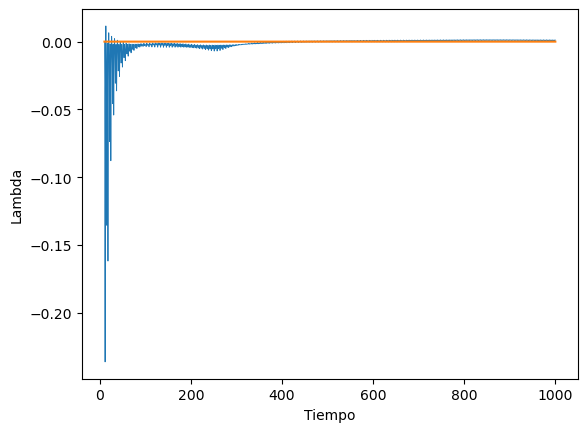

In [43]:
graphLyapunov(0,0.128846,0.018450,1/100,0.01,1000,0.001)

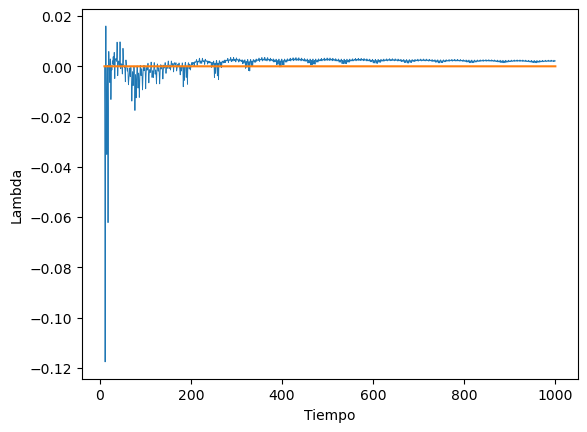

In [44]:
graphLyapunov(0,0.128846,0.018450,1/24,0.01,1000,0.001)

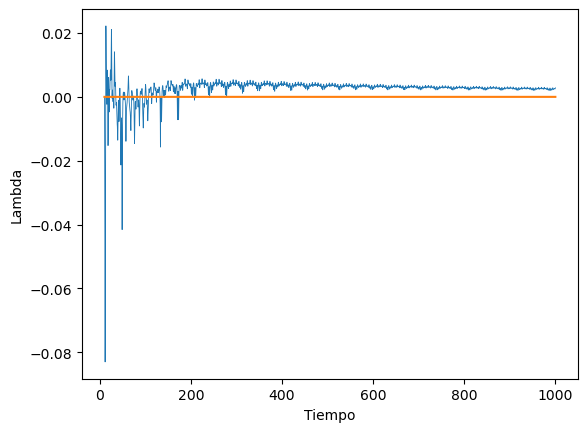

In [45]:
graphLyapunov(0,0.128846,0.018450,1/12,0.01,1000,0.001)

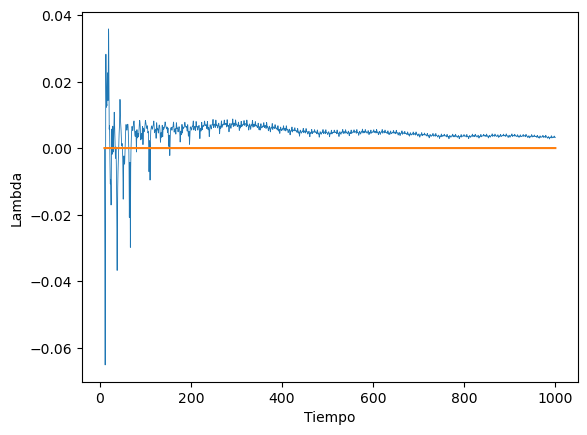

In [46]:
graphLyapunov(0,0.128846,0.018450,1/8,0.01,1000,0.001)

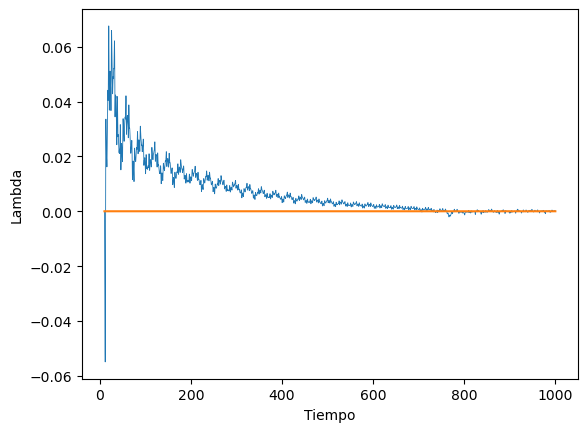

In [47]:
graphLyapunov(0,0.128846,0.018450,1/6,0.01,1000,0.001)